In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/gender_classification_v7.csv')

data.columns

data.shape

data.info

data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.head(5)

# Hacemos una columna booleana para ver si es hombre o no (mujer)
data['IsMale'] = data['gender'].replace({'Male': True, 'Female': False})
data = data.drop(columns='gender')

In [6]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

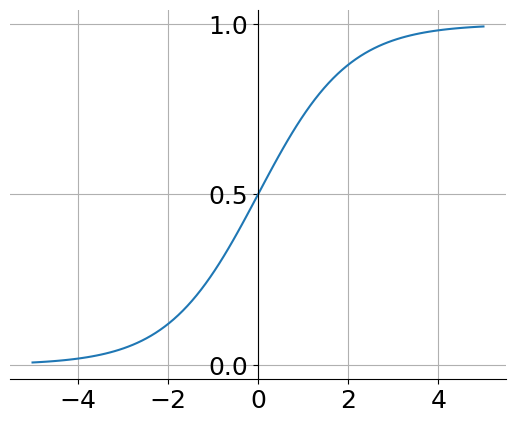

In [7]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


#lo de abajo es para GRAFICO

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

In [8]:
training_inputs = data.iloc[:, :-1].to_numpy()
training_outputs = data.iloc[:, -1].to_numpy()

# dimensiones correctas
training_outputs = training_outputs.reshape(-1, 1)

# entradas y salidas
print("Entradas:")
print(training_inputs)
print("Salidas:")
print(training_outputs)

Entradas:
[[ 1.  11.8  6.1 ...  0.   1.   1. ]
 [ 0.  14.   5.4 ...  0.   1.   0. ]
 [ 0.  11.8  6.3 ...  1.   1.   1. ]
 ...
 [ 1.  12.9  5.7 ...  0.   0.   0. ]
 [ 1.  13.2  6.2 ...  0.   0.   0. ]
 [ 1.  15.4  5.4 ...  1.   1.   1. ]]
Salidas:
[[ True]
 [False]
 [ True]
 ...
 [False]
 [False]
 [ True]]


In [9]:
# training_inputs = np.array([
#     [0,0,1],
#     [1,1,1],
#     [1,0,1],
#     [0,1,1]
# ])

# training_outputs = np.array([[0,1,1,0]]).T

# display(training_inputs)
# display(training_outputs)

In [10]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

1,11.8,6.1,1,0,1,1,1
0,14,5.4,0,0,1,0,0
0,11.8,6.3,1,1,1,1,1
0,14.4,6.1,0,1,1,1,1
1,13.5,5.9,0,0,0,0,0
1,13,6.8,1,1,1,1,1
1,15.3,6.2,1,1,1,0,1
0,13,5.2,0,0,0,0,0
1,11.9,5.4,1,0,1,1,0
1,12.1,5.4,0,0,0,0,0
0,12.5,5.4,1,1,1,1,1


In [11]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((7, 1))

synaptic_weights

array([[2.417022  ],
       [2.72032449],
       [2.00011437],
       [2.30233257],
       [2.14675589],
       [2.09233859],
       [2.18626021]])

In [12]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [13]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[2.417022  ]
 [2.72032449]
 [2.00011437]
 [2.30233257]
 [2.14675589]
 [2.09233859]
 [2.18626021]]
Outputs after training: 
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [14]:
table(training_values)

large = lambda x : display(HTML(''+str(x)+''))

long_hair = 1 #@param {type:"integer"}
forehead_width_cm = 1 #@param {type:"integer"}
forehead_height_cm = 1 #@param {type:"integer"}
nose_wide = 1 #@param {type:"integer"}
nose_long = 1 #@param {type:"integer"}
lips_thin = 1 #@param {type:"integer"}
distance_nose_to_lip_long = 1 #@param {type:"integer"}

input_layer = np.array([long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

1,11.8,6.1,1,0,1,1,1
0,14,5.4,0,0,1,0,0
0,11.8,6.3,1,1,1,1,1
0,14.4,6.1,0,1,1,1,1
1,13.5,5.9,0,0,0,0,0
1,13,6.8,1,1,1,1,1
1,15.3,6.2,1,1,1,0,1
0,13,5.2,0,0,0,0,0
1,11.9,5.4,1,0,1,1,0
1,12.1,5.4,0,0,0,0,0
0,12.5,5.4,1,1,1,1,1


0.9999998712184489

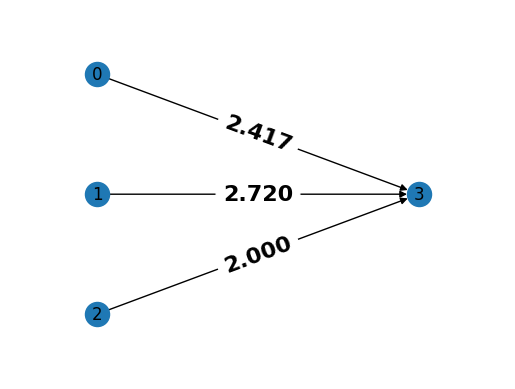

In [15]:
# Create a directed graph using NetworkX to visualize the neural network
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]
rels = list(itertools.product(*layers))
# You can modify the relationships as needed
# rels.append((3, 4))
# flatten = lambda l: [x for i in l for x in i]

# Define labels for nodes
labels = {i: v for i, v in enumerate(input_layer)}
#labels[3] = round(res, 3)
labels[4] = 0 if res < thresh else 1

# Define positions for nodes in the graph layout
pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
    for j, v in enumerate(l):
        pos[v] = (i, len(l) - j)
pos[3] = (pos[3][0], pos[1][1])
# You can add positions for more nodes if needed
# pos[4] = (pos[3][0] + 1, pos[1][1])

# Define edge labels based on synaptic_weights
weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

# Define options for drawing the graph
node_colors = ["lightblue"] * len(labels)  # Create a list of colors for each node
options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": node_colors,  # Use the list of colors
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

# Draw the neural network graph
nx.draw_networkx(G, pos, node_colors)

# Add edge labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

# Configure the plot
plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()
